***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [34]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [35]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [36]:
classes = [(0), (2 * 788), (5 * 788), (15 * 788), (25 * 788), (200000),]

### 2º Definir os labels das classes

In [37]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [38]:
import pandas as pd

frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True))
frequencia

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [39]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True)
percentual

Renda
E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [40]:
data = {'Frequencia': frequencia, 'Porcentagem (%)': percentual}
dist_freq_quantitativas_personalizadas = pd.DataFrame(data)
dist_freq_quantitativas_personalizadas

,Frequencia,Porcentagem (%)
Renda,,
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

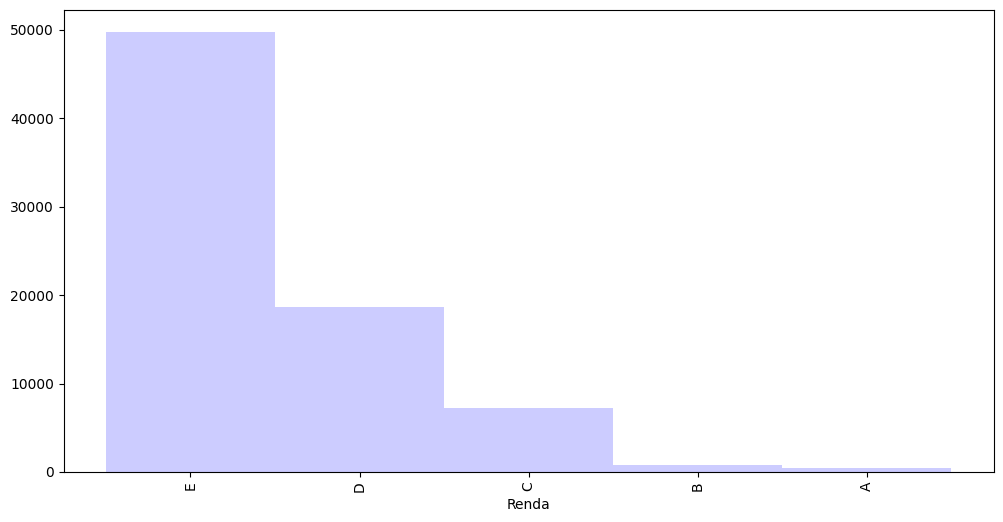

In [41]:
dist_freq_quantitativas_personalizadas['Frequencia'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize = (12, 6))

> ### Conclusões
<font color='yellow'>Resposta:</font>
É possível observar uma maior concentração de renda nas classes mais baixas, respectivamente "E" e "D", onde no gráfico a maior parte do gupo está nestas classificações.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: >

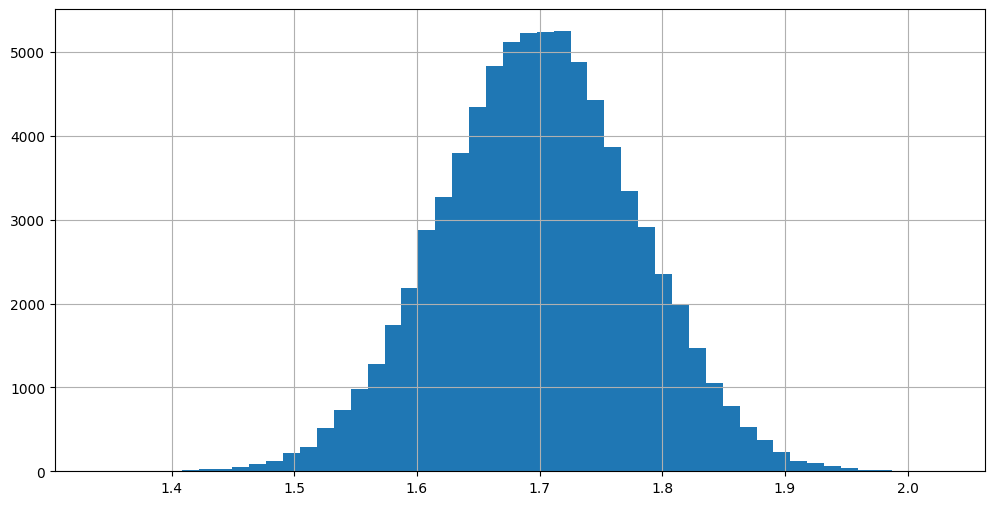

In [42]:
dados.Altura.hist(bins = 50, figsize=(12, 6))

<Axes: >

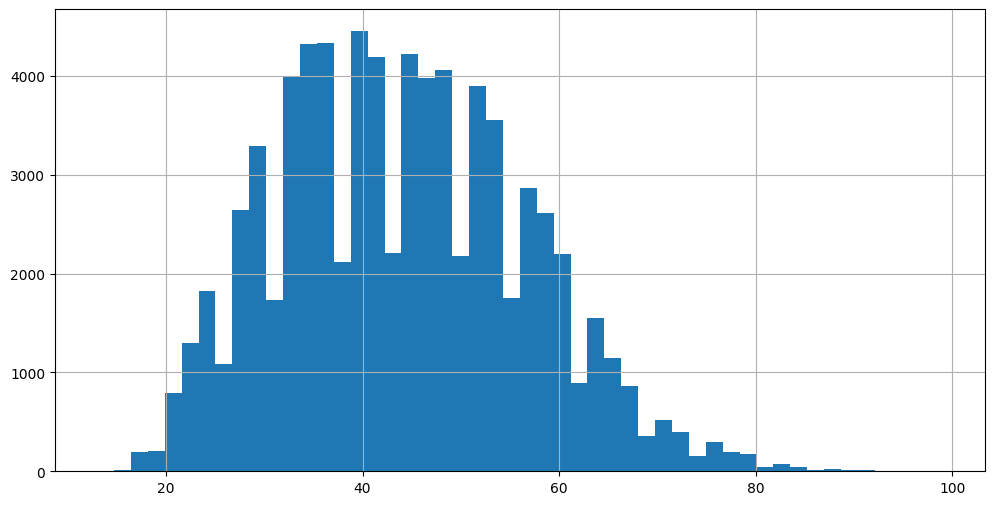

In [43]:
dados.Idade.hist(bins = 50, figsize=(12, 6))

<Axes: >

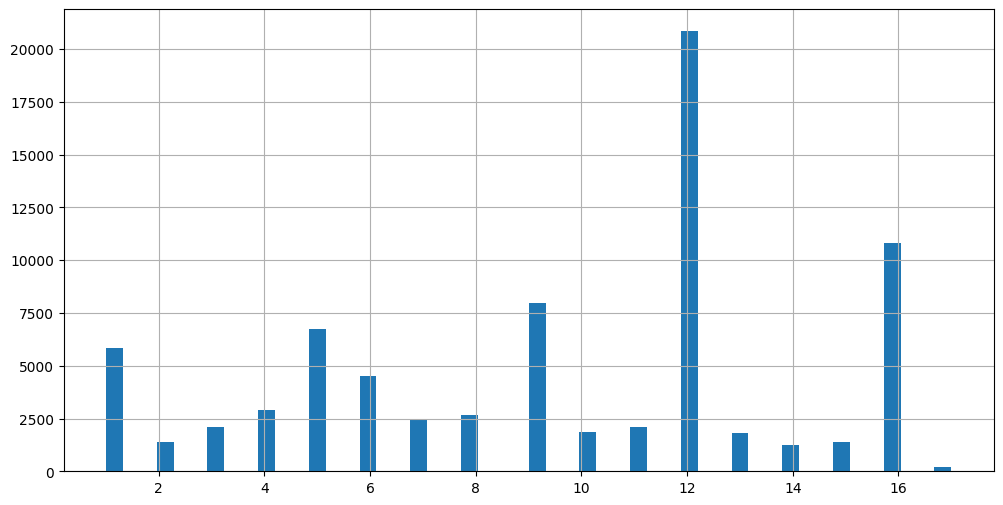

In [44]:
dados['Anos de Estudo'].hist(bins = 50, figsize=(12, 6))

> ### Conclusões

<font color='yellow'>Resposta:</font>
Em Altura temos uma Simétrica, em Idade uma Assimetria a direita e em Anos de Estudo, temos uma Assimetria a esquerda

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: xlabel='Renda', ylabel='Count'>

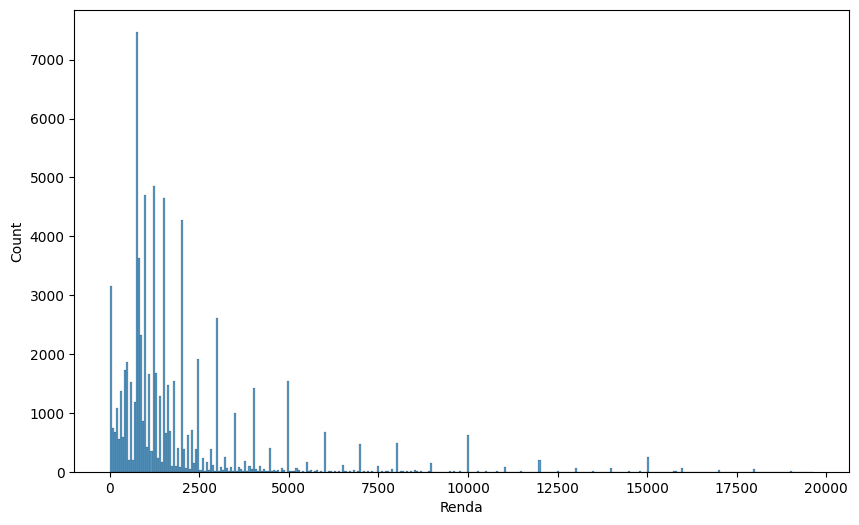

In [45]:
ax = sns.histplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(10, 6)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [46]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [47]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [48]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

<font color='yellow'>Resposta:</font>
As populações Branca e Parda são as que mais possuem pessoas dentro do grupo de análise, também é possivel validar, que se referem as maiores porcentagens, e também é possível observar a dispariedade entre Homens e Mulheres

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [49]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [50]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [51]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [52]:
desvio_medio_absoluto = abs(dados['Renda'] - dados['Renda'].mean()).mean()
desvio_medio_absoluto

1526.4951371638058

### Obtenha a variância

In [53]:
variancia = dados['Renda'].var()
variancia

11044906.006217021

### Obtenha o desvio-padrão

In [54]:
np.sqrt(variancia)

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [55]:
renda = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = {'mean', 'median', 'max'}, values = dados.Renda)
renda.rename(index = sexo, inplace = True)
renda.rename(columns = cor, inplace = True)
renda

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [56]:
dispercao_renda = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = {'var', 'std'}, values = dados.Renda)
dispercao_renda.rename(index = sexo, inplace = True)
dispercao_renda.rename(columns = cor, inplace = True)
mad = np.mean(np.abs(dados['Renda'] - dados['Renda'].mean()))
dispercao_renda['MAD'] = mad
round(dispercao_renda, 2)

std                                               var  \
Cor        Indígena   Branca    Preta  Amarela    Parda      Indígena   
Sexo                                                                    
Masculino   1204.09  4750.79  1936.31  5740.82  2312.09  1.449841e+06   
Feminino   11957.50  3251.01  1349.80  3731.17  1596.23  1.429818e+08   

                                                                MAD  
Cor             Branca       Preta      Amarela       Parda          
Sexo                                                                 
Masculino  22570023.41  3749293.59  32957069.62  5345747.15  1526.5  
Feminino   10569086.53  1821959.52  13921656.88  2547959.94  1526.5

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

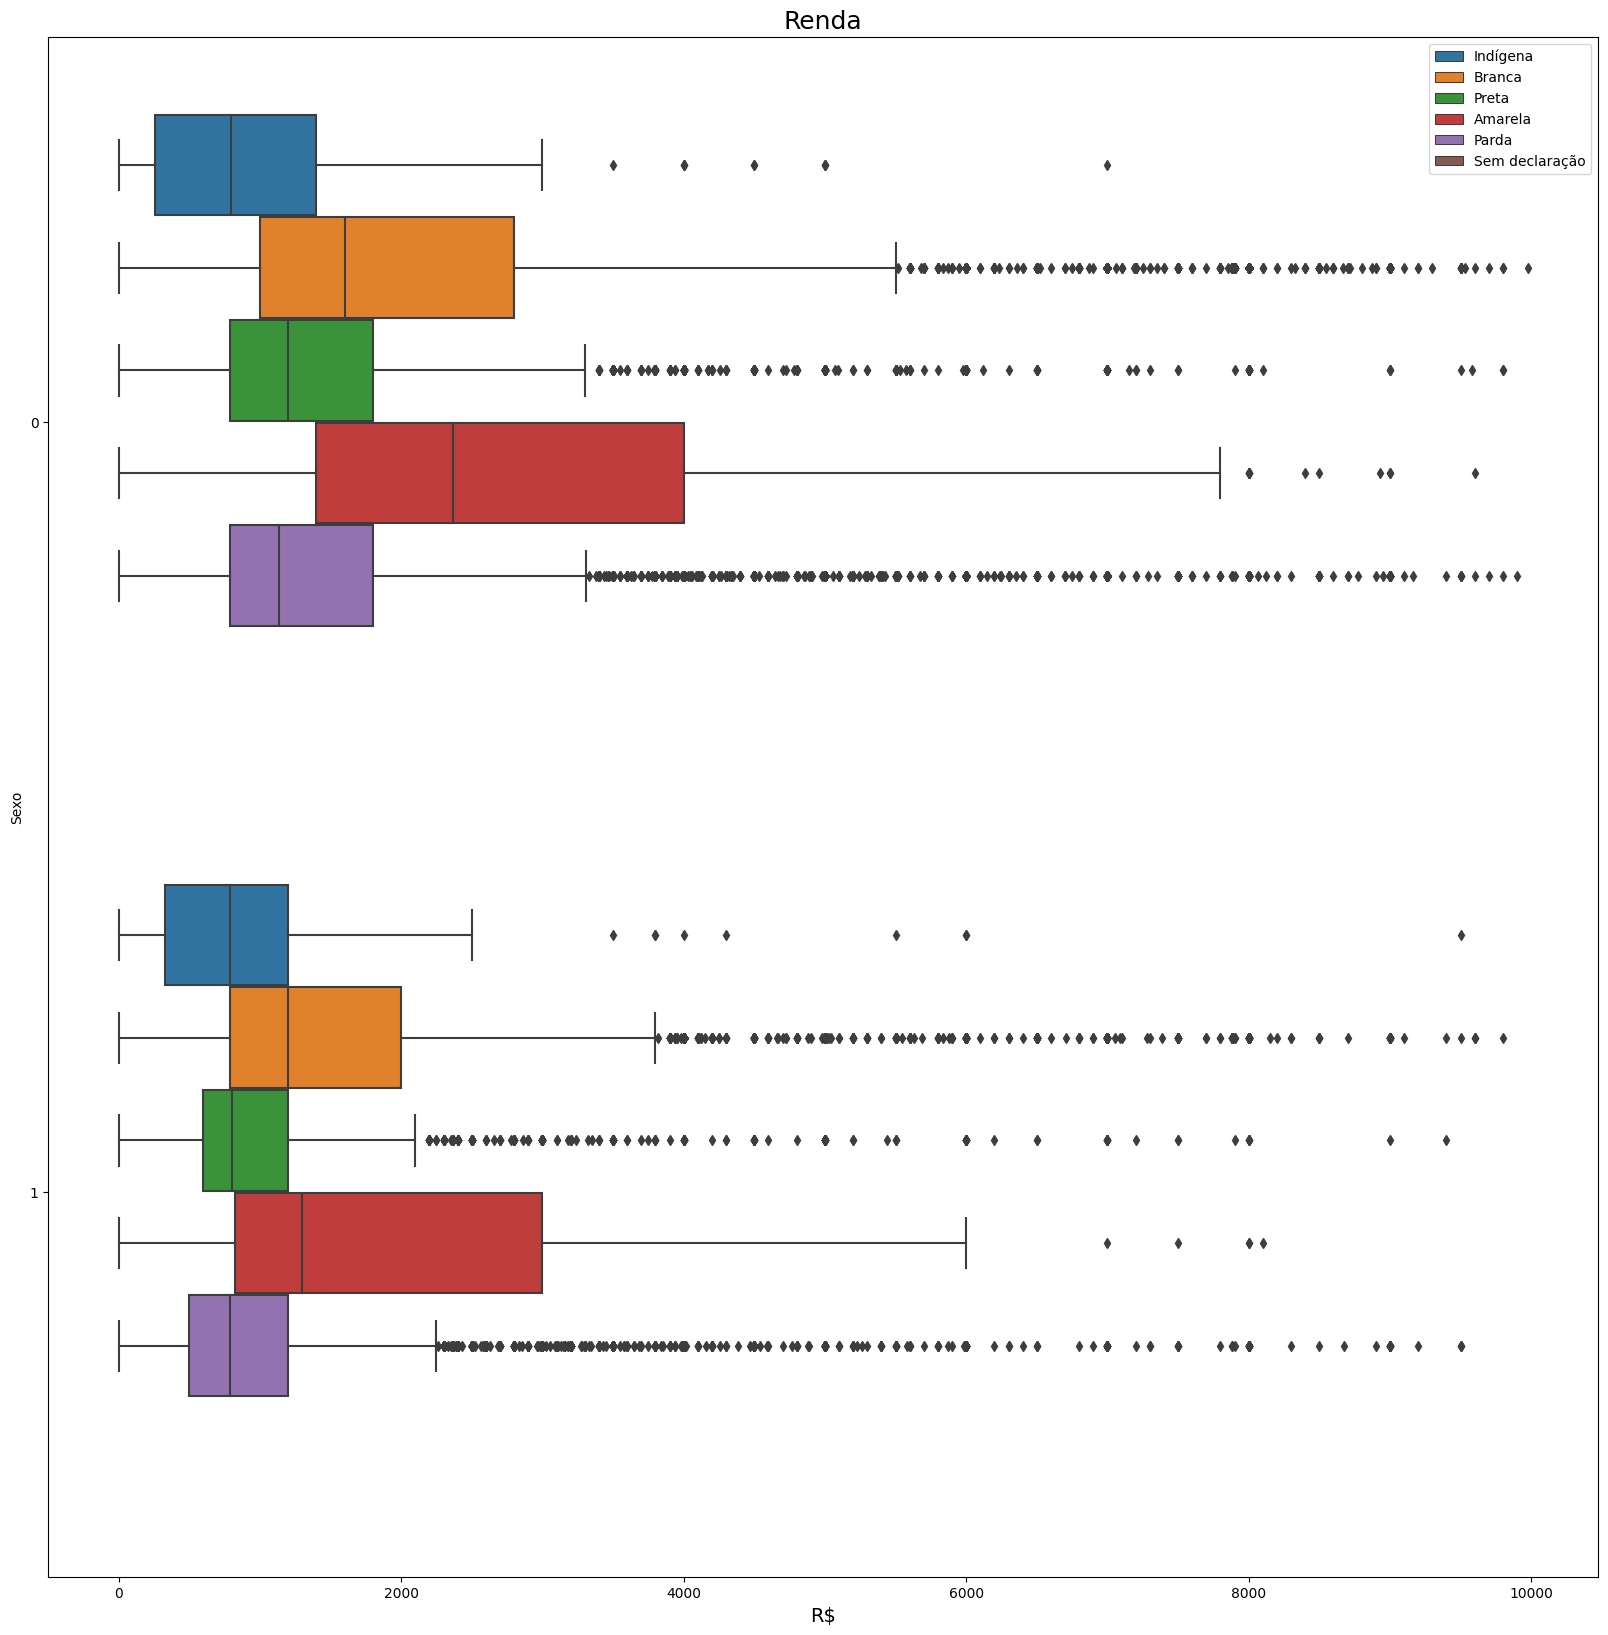

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
ax = sns.boxplot(x = 'Renda', y = 'Sexo', hue = 'Cor', hue_order = cor, data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(20, 20)
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
# Obter as legendas existentes
handles, labels = ax.get_legend_handles_labels()
# Substituir as legendas pelo mapeamento personalizado
labels = [cor[int(label)] if label.isdigit() else label for label in labels]
# Atualizar as legendas no gráfico
ax.legend(handles, labels)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [58]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [59]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [66]:
mapeamento = {0: 'Masculino', 1: 'Feminino'}
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc = {'mean', 'median', 'max', 'std'}, values = dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(index = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max             mean           median  \
Sexo                                 0       1        0        1       0   
Anos de Estudo                                                             
Sem instrução e menos de 1 ano   30000   10000   799.49   516.20   700.0   
1 ano                            30000    2000   895.63   492.77   788.0   
2 anos                           40000    4000   931.18   529.91   788.0   
3 anos                           80000    3500  1109.20   546.85   800.0   
4 anos                           50000   10000  1302.33   704.28  1000.0   
5 anos                           35000    8000  1338.65   781.39  1045.0   
6 anos                           25000    6000  1448.88   833.73  1200.0   
7 anos                           40000    9000  1465.50   830.75  1200.0   
8 anos                           30000   18000  1639.40   933.62  1300.0   
9 anos                           60000   20000  1508.04   868.02  1200.0   
10 anos                          45000    6000  1731.27   925.92  1218.0   
11 anos                         200000  100000  2117.06  1286.79  1500.0   
12 anos                          30000  120000  2470.33  1682.31  1800.0   
13 anos                          25000   20000  3195.10  1911.73  2400.0   
14 anos                          50000   20000  3706.62  2226.46  2500.0   
15 anos ou mais                 200000  100000  6134.28  3899.51  4000.0   
Não determinados                  7000    3000  1295.76   798.17  1200.0   

                                            std           
Sexo                                 1        0        1  
Anos de Estudo                                            
Sem instrução e menos de 1 ano   390.0  1023.90   639.31  
1 ano                            400.0  1331.95   425.29  
2 anos                           450.0  1435.17   498.23  
3 anos                           500.0  2143.80   424.12  
4 anos                           788.0  1419.82   629.55  
5 anos                           788.0  1484.65   635.78  
6 anos                           788.0  1476.63   574.55  
7 anos                           788.0  1419.71   602.04  
8 anos                           800.0  1515.58   896.78  
9 anos                           788.0  2137.66   973.22  
10 anos                          800.0  2078.61   620.61  
11 anos                         1000.0  2676.54  1819.04  
12 anos                         1200.0  2268.08  4851.83  
13 anos                         1300.0  2797.12  2053.79  
14 anos                         1600.0  3987.21  2064.08  
15 anos ou mais                 2800.0  7447.61  4212.77  
Não determinados                 788.0   979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [69]:
anos_de_estudo #puxa do dicionario criado

{1: 'Sem instrução e menos de 1 ano',
 2: '1 ano',
 3: '2 anos',
 4: '3 anos',
 5: '4 anos',
 6: '5 anos',
 7: '6 anos',
 8: '7 anos',
 9: '8 anos',
 10: '9 anos',
 11: '10 anos',
 12: '11 anos',
 13: '12 anos',
 14: '13 anos',
 15: '14 anos',
 16: '15 anos ou mais',
 17: 'Não determinados'}

In [70]:
#Utiliza o dicionário criado para definir os valores
[key for key in anos_de_estudo.values()]

['Sem instrução e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'Não determinados']

<Axes: title={'center': 'Box-plot da Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

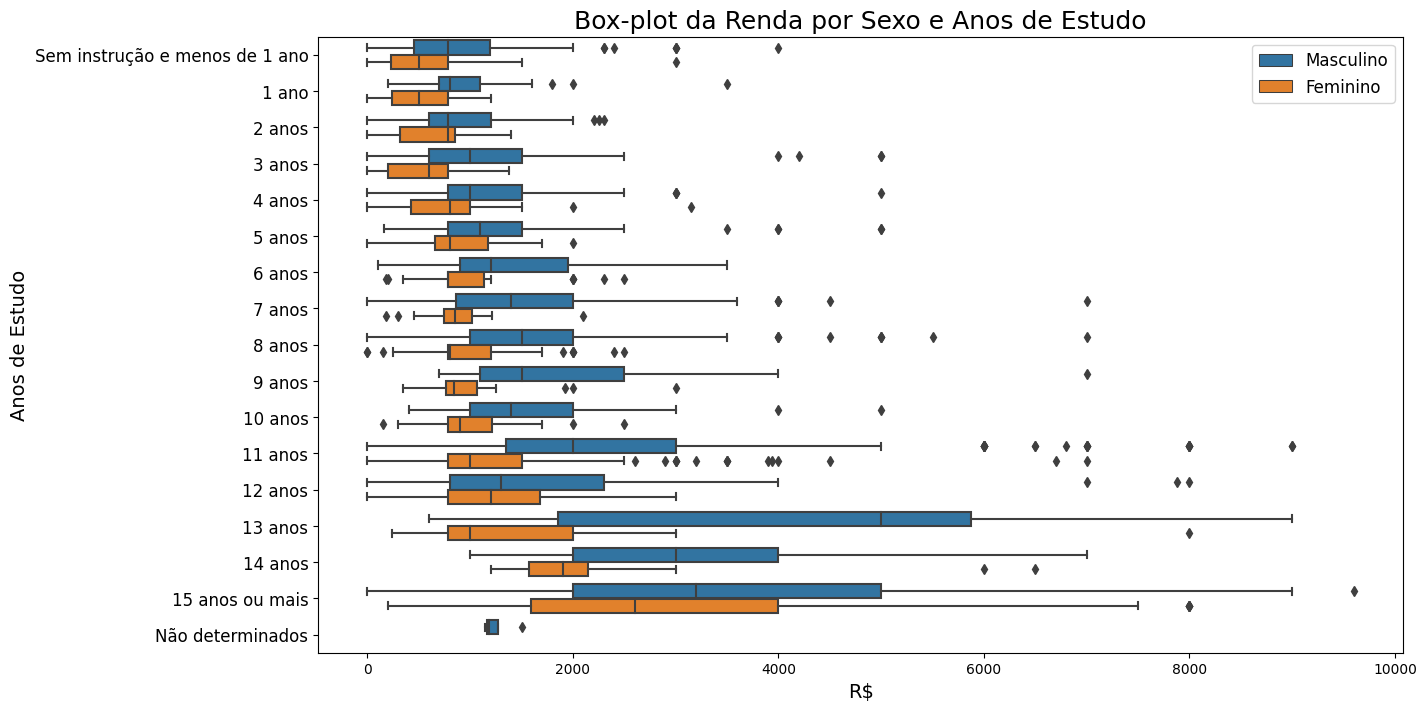

In [68]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient='h')
ax.figure.set_size_inches(14, 8) # Personalizando o tamanho

ax.set_title('Box-plot da Renda por Sexo e Anos de Estudo', fontsize = 18) # configurando o título

ax.set_xlabel('R$', fontsize = 14) # configurando o label do eixo x
ax.set_ylabel('Anos de Estudo', fontsize = 14) # configurando o label do eixo y

ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12) # configurando o label de cada categoria do eixo Y

# Configurações de legenda do gráfico (Sexo)
hanles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [72]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Box-plot da Renda por Estados'}, xlabel='R$', ylabel='Estados'>

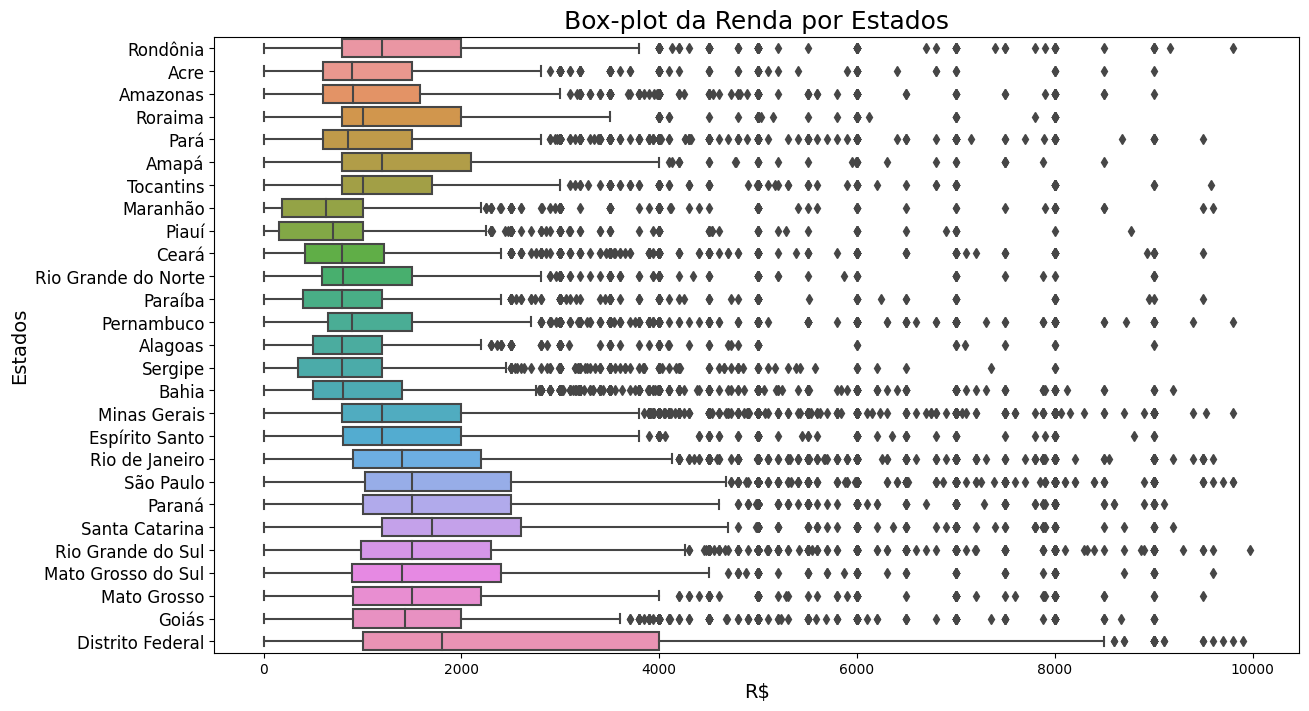

In [73]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(14, 8) # Personalizando o tamanho

ax.set_title('Box-plot da Renda por Estados', fontsize = 18) # configurando o título

ax.set_xlabel('R$', fontsize = 14) # configurando o label do eixo x
ax.set_ylabel('Estados', fontsize = 14) # configurando o label do eixo y

ax.set_yticklabels([key for key in uf.values()], fontsize=12) # configurando o label de cada categoria do eixo Y

ax

> ### Conclusões

Escreva suas conclusões aqui...